### Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np
import json

from sklearn.preprocessing import StandardScaler

### Upload & Load Dataset

In [ ]:
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


### Cek Struktur Data

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


### ekstraksi Sutradara dari crew (JSON)

In [ ]:
def get_director(crew_str):
    crew = json.loads(crew_str)
    for person in crew:
        if person['job'] == 'Director':
            return person['name']
    return None

### Terapkan fungsi ke dataset credits

In [ ]:
credits['director'] = credits['crew'].apply(get_director)

credits[['movie_id', 'director']].head()

,movie_id,director
0,19995,James Cameron
1,285,Gore Verbinski
2,206647,Sam Mendes
3,49026,Christopher Nolan
4,49529,Andrew Stanton


### Seleksi kolom penting dari credits

In [ ]:
credits_clean = credits[['movie_id', 'director']]
credits_clean.head()

,movie_id,director
0,19995,James Cameron
1,285,Gore Verbinski
2,206647,Sam Mendes
3,49026,Christopher Nolan
4,49529,Andrew Stanton


### Merge Dataset Movies & Credits

In [ ]:
data = movies.merge(
    credits_clean,
    left_on='id',
    right_on='movie_id',
    how='left'
)

data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,director
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,James Cameron
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Gore Verbinski
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,Sam Mendes
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,Christopher Nolan
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,49529,Andrew Stanton


### Seleksi Fitur untuk Analisis

In [ ]:
selected_features = data[
    ['budget', 'revenue', 'popularity', 'vote_average']
]

selected_features.head()

,budget,revenue,popularity,vote_average
0,237000000,2787965087,150.437577,7.2
1,300000000,961000000,139.082615,6.9
2,245000000,880674609,107.376788,6.3
3,250000000,1084939099,112.312950,7.6
4,260000000,284139100,43.926995,6.1


### Cek Missing Value & Nilai 0

In [ ]:
selected_features.isnull().sum()

,0
budget,0
revenue,0
popularity,0
vote_average,0


In [ ]:
(selected_features == 0).sum()

,0
budget,1037
revenue,1427
popularity,1
vote_average,63


### Menangani Missing Value & Nilai 0

In [ ]:
# Ganti missing value dengan 0
selected_features = selected_features.fillna(0)

# Opsional: buang data dengan budget & revenue = 0
selected_features = selected_features[
    (selected_features['budget'] > 0) &
    (selected_features['revenue'] > 0)
]

selected_features.shape

(3229, 4)

### Normalisasi / Scaling Data

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

scaled_data[:5]

array([[ 4.42320670e+00,  1.43161254e+01,  3.35739643e+00,
         1.01933200e+00],
       [ 5.84244953e+00,  4.50818140e+00,  3.04337758e+00,
         6.75986642e-01],
       [ 4.60342801e+00,  4.07695973e+00,  2.16656028e+00,
        -1.07040670e-02],
       [ 4.71606633e+00,  5.17354044e+00,  2.30306870e+00,
         1.47712580e+00],
       [ 4.94134297e+00,  8.74497413e-01,  4.11870943e-01,
        -2.39600970e-01]])

### Final Check (Data Siap Model)

In [ ]:
print("Jumlah data akhir:", scaled_data.shape)

Jumlah data akhir: (3229, 4)


## Modeling (K-Means Clustering)

### Menentukan Jumlah Cluster (Elbow Method)

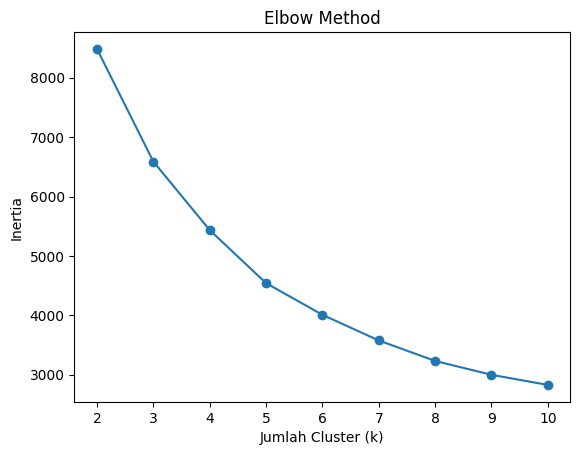

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Membuat Model K-Means (k = 4)

In [ ]:
from sklearn.cluster import KMeans

k = 4

kmeans = KMeans(
    n_clusters=k,
    random_state=42,
    n_init=10
)

clusters = kmeans.fit_predict(scaled_data)

clusters[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

### Simpan Hasil Cluster ke Data

In [ ]:
clustered_data = selected_features.copy()
clustered_data['cluster'] = clusters

clustered_data.head()

,budget,revenue,popularity,vote_average,cluster
0,237000000,2787965087,150.437577,7.2,1
1,300000000,961000000,139.082615,6.9,1
2,245000000,880674609,107.376788,6.3,1
3,250000000,1084939099,112.312950,7.6,1
4,260000000,284139100,43.926995,6.1,1


### Liat jumlah film di tiap cluster


In [ ]:
clustered_data['cluster'].value_counts()

,count
cluster,
0,1519
2,1365
1,339
3,6


### LIAT FILM APA SAJA di cluster 0

In [ ]:
clustered_data[clustered_data['cluster'] == 3].head()

,budget,revenue,popularity,vote_average,cluster
28,150000000,1513528810,418.708552,6.5,3
94,170000000,773328629,481.098624,7.9,3
95,165000000,675120017,724.247784,8.1,3
127,150000000,378858340,434.278564,7.2,3
546,74000000,1156730962,875.581305,6.4,3


### Lihat Ringkasan Tiap Cluster

In [ ]:
clustered_data.groupby('cluster').mean()

,budget,revenue,popularity,vote_average
cluster,,,,
0,2.352317e+07,7.848607e+07,27.876178,6.928506
1,1.355196e+08,5.169904e+08,72.621181,6.576696
2,3.577536e+07,6.720348e+07,17.098023,5.549817
3,1.278333e+08,8.801133e+08,574.747464,7.250000


## EVALUATION

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_data, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.3112602598345987
